# Taiwanese Food 101 Classification with Deep Learning in Keras
In this experiment, we use Taiwanese-Food-101 Dataset to implement image classfication and compare with different famous model.
***

## Loading and Preprocessing Dataset
Import all of the packages we needed to use.

In [5]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.layers.core import Dense, Flatten
from keras.layers import Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import Model
import os
import numpy as np
from keras.models import load_model

def acc_top5(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=5)

## Let's look at some random images from each food class
---

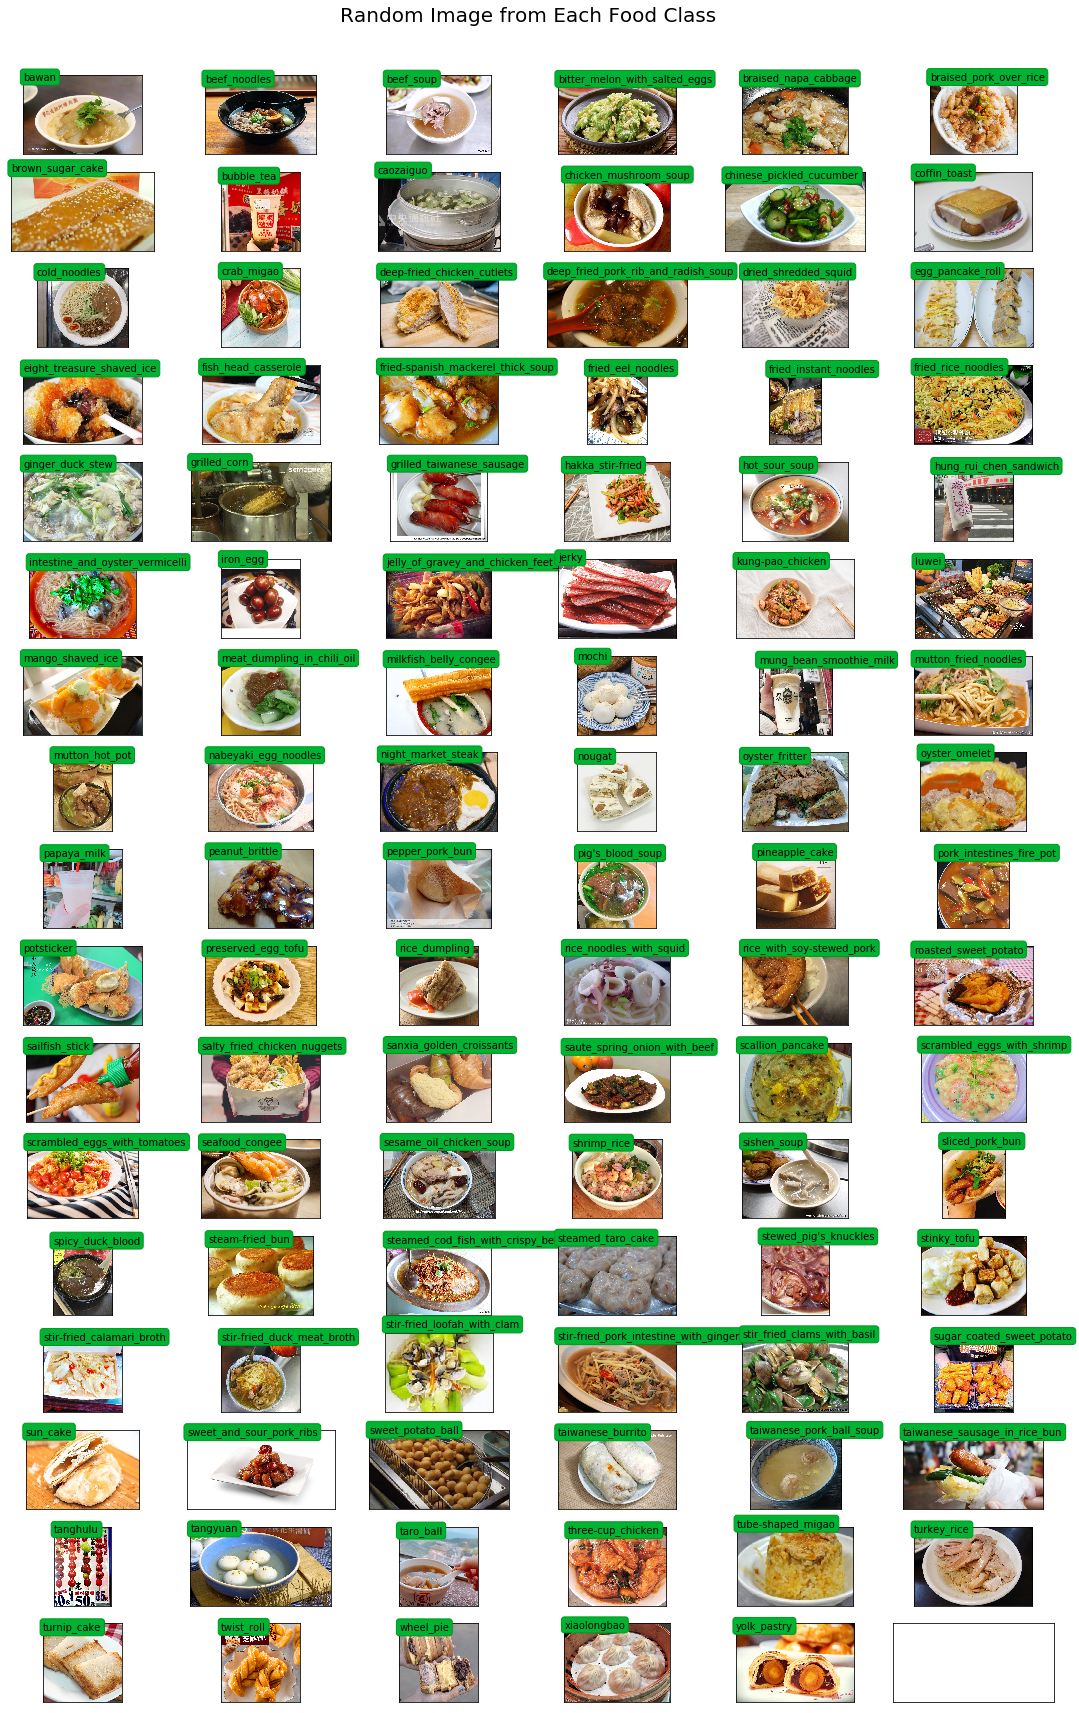

In [6]:
root_dir = './Taiwanese Food 101/images'
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25))
fig.suptitle('Random Image from Each Food Class', fontsize=20)
sorted_food_dirs = sorted(os.listdir(root_dir))
for i in range(rows):
    for j in range(cols):
        try:
            food_dir = sorted_food_dirs[i*cols + j]
        except:
            break
        all_files = os.listdir(os.path.join(root_dir, food_dir))
        rand_img = np.random.choice(all_files)
        img = plt.imread(os.path.join(root_dir, food_dir, rand_img))
        ax[i][j].imshow(img)
        ec = (0, .6, .1)
        fc = (0, .7, .2)
        ax[i][j].text(0, -20, food_dir, size=10, rotation=0,
                ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Use ImageDataGenerator to load image
***

In [7]:
train_path = "./train/"
valid_path = "./validation/"
test_path = "./test/"


train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_path,  
    target_size=(150, 150), 
    color_mode = "rgb",
    batch_size=8,
    class_mode='categorical',
    shuffle = True,
    seed = 42 )

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    color_mode = "rgb"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size =(150, 150),
    color_mode ="rgb",
    batch_size = 1,
    class_mode = None,
    shuffle = False
)

Found 10100 images belonging to 101 classes.
Found 5050 images belonging to 101 classes.
Found 5050 images belonging to 101 classes.


## Use different famous model to train model
* DenseNet
* Inception
* VGG
* ResNet
* MobileNet

You can import all model I used in Keras.

### Build model

In [ ]:
base_model = keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
#base_model = keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
#base_model = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
#base_model = keras.applications.resnet.ResNet50(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
#base_model = keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(.5)(x)

predictions = Dense(101, activation='softmax')(x)

model = Model(input=base_model.input, output=predictions)

In [ ]:
model.compile(Adam(lr=.00002122),
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', acc_top5])

### Training model

In [12]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

filepath="./bestModel.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', save_weights_only=False)
es = EarlyStopping(monitor='val_acc', patience=20, verbose=0, mode='auto')

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size 
STEP_SIZE_VALID = valid_generator.n // valid_generator.batch_size

history = model.fit_generator(
      train_generator,
      steps_per_epoch=STEP_SIZE_TRAIN,
      epochs=100,
      validation_data=valid_generator,
      validation_steps=STEP_SIZE_VALID,
      callbacks=[es, checkpoint]
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
 375/1262 [=======>......................] - ETA: 4:05 - loss: 4.7523 - acc: 0.0450 - acc_top5: 0.1400 ETA: 4:11 - loss: 4.7768 - ac

C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 256 bytes but only got 230. Skipping tag 50341
  " Skipping tag %s" % (size, len(data), tag))


 500/1262 [==========>...................] - ETA: 3:18 - loss: 4.5861 - acc: 0.0602 - acc_top5: 0.1775

C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\PIL\Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


1261/1262 [============================>.] - ETA: 0s - loss: 3.7985 - acc: 0.1578 - acc_top5: 0.3656 - ETA: 26s - loss: 3

C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3004 bytes but only got 0. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41486
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag))


1262/1262 [==============================] - 401s 317ms/step - loss: 3.7974 - acc: 0.1579 - acc_top5: 0.3658 - val_loss: 1.8253 - val_acc: 0.5198 - val_acc_top5: 0.8156

Epoch 00001: val_acc improved from -inf to 0.51981, saving model to D:/Datasets/Food101&TaiwaneseDish/Model/Taiwanese Dish model/bestModel_v1.h5
Epoch 2/100
1262/1262 [==============================] - 200s 158ms/step - loss: 2.2049 - acc: 0.4325 - acc_top5: 0.7331 - val_loss: 1.2751 - val_acc: 0.6430 - val_acc_top5: 0.8971

Epoch 00002: val_acc improved from 0.51981 to 0.64300, saving model to D:/Datasets/Food101&TaiwaneseDish/Model/Taiwanese Dish model/bestModel_v1.h5
Epoch 3/100
1262/1262 [==============================] - 199s 158ms/step - loss: 1.6596 - acc: 0.5562 - acc_top5: 0.8357 - val_loss: 1.1071 - val_acc: 0.6932 - val_acc_top5: 0.9193

Epoch 00003: val_acc improved from 0.64300 to 0.69318, saving model to D:/Datasets/Food101&TaiwaneseDish/Model/Taiwanese Dish model/bestModel_v1.h5
Epoch 4/100
1262/1262 [==

1262/1262 [==============================] - 258s 204ms/step - loss: 0.1268 - acc: 0.9603 - acc_top5: 0.9982 - val_loss: 1.2741 - val_acc: 0.7850 - val_acc_top5: 0.9443

Epoch 00031: val_acc did not improve from 0.80365
Epoch 32/100
1262/1262 [==============================] - 264s 209ms/step - loss: 0.1146 - acc: 0.9644 - acc_top5: 0.9980 - val_loss: 1.1905 - val_acc: 0.7890 - val_acc_top5: 0.9512

Epoch 00032: val_acc did not improve from 0.80365
Epoch 33/100
1262/1262 [==============================] - 231s 183ms/step - loss: 0.1206 - acc: 0.9631 - acc_top5: 0.9988 - val_loss: 1.3647 - val_acc: 0.7808 - val_acc_top5: 0.9415

Epoch 00033: val_acc did not improve from 0.80365
Epoch 34/100
1262/1262 [==============================] - 199s 157ms/step - loss: 0.1068 - acc: 0.9667 - acc_top5: 0.9983 - val_loss: 1.2564 - val_acc: 0.7898 - val_acc_top5: 0.9520

Epoch 00034: val_acc did not improve from 0.80365
Epoch 35/100
1262/1262 [==============================] - 198s 157ms/step - loss:

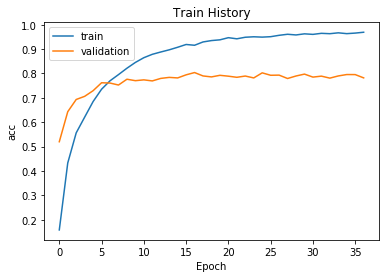

In [14]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
    
    
show_train_history(history,"acc","val_acc")

## Evaluate Model
***
Use testing data to evaluate the accuracy of the model.

### Load model

In [ ]:
filepath = "./bestModel.h5"
model = load_model(filepath, custom_objects={'acc_top5':acc_top5})

### Predict result

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

### Change probibility to classes

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
print(labels)
labels = dict((v,k) for k,v in labels.items())
results = [labels[k] for k in predicted_class_indices]

### Create labels list

In [30]:
filepath = "./test"
test_filepath = os.listdir(filepath)
test_filepath.sort() 
    
labels = []
for i in range(len(test_filepath)):
    for a in range(50):
        labels.append(test_filepath[i]) 

### Calculate accuracy

In [31]:
acc=0
for i in range(5050):
    if results[i]==labels[i]:
            acc=acc+1

print("Accuracy:",acc/5050)

Accuracy: 0.7833663366336634
